In [40]:
%matplotlib inline
import utils; reload(utils)
from utils import *

## Simple linear regression in terms of a neural network: x -> y

In [180]:
# indep variable
x = np.array(range(30))/30.

In [187]:
# noise 
d = (random(30) - 0.5)/10.
# response + noise
y = 1. + 2. * x + d 

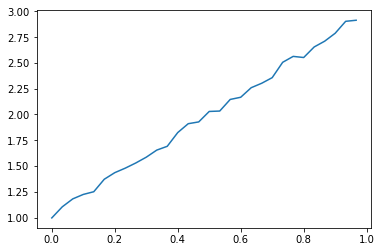

In [188]:
plt.plot(x,y)

In [196]:
# build model: one (dense) layer nn, 1 output node, 1 input node
lm = Sequential([Dense(1, input_shape=(1,))])
# Use stochastic gradient descent (SGD) and Mean Squared Error (MSE) as loss function
lm.compile(optimizer=SGD(lr=0.1), loss='mse') 
lm.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_20 (InputLayer)      (None, 1)             0                                            
____________________________________________________________________________________________________
dense_20 (Dense)                 (None, 1)             2           dense_input_20[0][0]             
Total params: 2
Trainable params: 2
Non-trainable params: 0
____________________________________________________________________________________________________


In [218]:
lm.evaluate(x, y, verbose=0)

0.0010846134973689914

In [219]:
lm.fit(x, y, nb_epoch=80, batch_size=30)

Epoch 1/80
30/30 [==============================] - 0s - loss: 0.0011
Epoch 2/80
30/30 [==============================] - 0s - loss: 0.0011
Epoch 3/80
30/30 [==============================] - 0s - loss: 0.0011
Epoch 4/80
30/30 [==============================] - 0s - loss: 0.0011
Epoch 5/80
30/30 [==============================] - 0s - loss: 0.0011
Epoch 6/80
30/30 [==============================] - 0s - loss: 0.0010
Epoch 7/80
30/30 [==============================] - 0s - loss: 0.0010
Epoch 8/80
30/30 [==============================] - 0s - loss: 0.0010
Epoch 9/80
30/30 [==============================] - 0s - loss: 0.0010
Epoch 10/80
30/30 [==============================] - 0s - loss: 0.0010
Epoch 11/80
30/30 [==============================] - 0s - loss: 0.0010
Epoch 12/80
30/30 [==============================] - 0s - loss: 9.9887e-04
Epoch 13/80
30/30 [==============================] - 0s - loss: 9.9226e-04
Epoch 14/80
30/30 [==============================] - 0s - loss: 9.8582e-04
Epo

In [220]:
a = lm.get_weights()[1][0]; b = lm.get_weights()[0][0][0]

In [221]:
def lin(a,b,x): return a + b * x

In [222]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a, b, x))
plt.close()

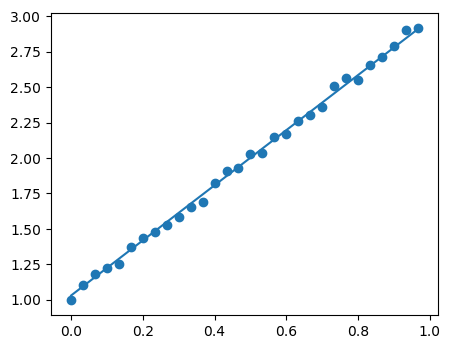

In [223]:
fig

In [225]:
b

1.9441571

## Multiple linear regression: (x1, x2) -> y

In [264]:
# 30 by 2 matrix containing x1 and x2 in its two columns
x = np.transpose(np.array((range(30), permutation(range(30))))/30.)

In [265]:
# Add a small perturbation over perfect linear relationship bwn indep vars (x1,x2) and the response (y)
d = random(30)/30000.
# Response variable
y = np.matmul(x, [2., 3.]) + 1. #+ d

In [266]:
x[:5]

array([[ 0.    ,  0.6333],
       [ 0.0333,  0.0333],
       [ 0.0667,  0.    ],
       [ 0.1   ,  0.7333],
       [ 0.1333,  0.2333]])

In [267]:
# Set up 1-layer neural network, 1 output and 2 input neurons
lm2 = Sequential([Dense(1, input_shape=(2,))])
# Use stochastic gradient descent (SGD),  and mean squared error (MSE) loss; MSE is *terrible* loss fn for optimization
lm2.compile(optimizer=SGD(lr=0.1), loss='mse')

In [268]:
lm2.evaluate(x, y, verbose=0)

14.708146095275879

In [281]:
%time lm2.fit(x, y, nb_epoch=80, batch_size=900)

Epoch 1/80
30/30 [==============================] - 0s - loss: 7.1336e-05
Epoch 2/80
30/30 [==============================] - 0s - loss: 6.9423e-05
Epoch 3/80
30/30 [==============================] - 0s - loss: 6.7560e-05
Epoch 4/80
30/30 [==============================] - 0s - loss: 6.5747e-05
Epoch 5/80
30/30 [==============================] - 0s - loss: 6.3984e-05
Epoch 6/80
30/30 [==============================] - 0s - loss: 6.2267e-05
Epoch 7/80
30/30 [==============================] - 0s - loss: 6.0597e-05
Epoch 8/80
30/30 [==============================] - 0s - loss: 5.8971e-05
Epoch 9/80
30/30 [==============================] - 0s - loss: 5.7390e-05
Epoch 10/80
30/30 [==============================] - 0s - loss: 5.5850e-05
Epoch 11/80
30/30 [==============================] - 0s - loss: 5.4352e-05
Epoch 12/80
30/30 [==============================] - 0s - loss: 5.2893e-05
Epoch 13/80
30/30 [==============================] - 0s - loss: 5.1475e-05
Epoch 14/80
30/30 [===============

In [282]:
lm2.evaluate(x, y, verbose=0)

8.1011903603211977e-06

In [283]:
lm2.get_weights() # MSE cannot get the fitting parameters right

[array([[ 1.9943],
        [ 2.9932]], dtype=float32), array([ 1.0065], dtype=float32)]

In [250]:
??get_data

In [19]:
??get_batches

In [20]:
??gen.flow_from_directory

Object `gen.flow_from_directory` not found.


In [21]:
lm.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_2 (InputLayer)       (None, 2)             0                                            
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             3           dense_input_2[0][0]              
Total params: 3
Trainable params: 3
Non-trainable params: 0
____________________________________________________________________________________________________


In [58]:
theano.config.floatX = 'float32'